In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## This dataset is created for prediction of Graduate Admissions from an Indian perspective.This dataset was built with the purpose of helping students in shortlisting universities with their profiles. The predicted output gives them a fair idea about their chances for a particular university.The dataset contains several parameters which are considered important during the application for Master's Programs

In [2]:
graduate = pd.read_csv("Admission_Predict.csv",index_col="Serial No.")
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
graduate.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [4]:
graduate["University Rating"].nunique()

5

<AxesSubplot:xlabel='GRE Score', ylabel='Count'>

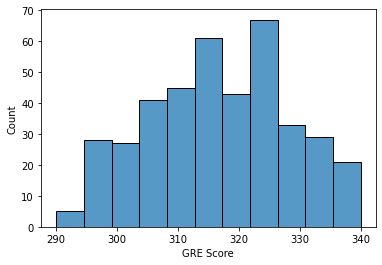

In [5]:
sns.histplot(graduate["GRE Score"])

<AxesSubplot:xlabel='TOEFL Score', ylabel='Count'>

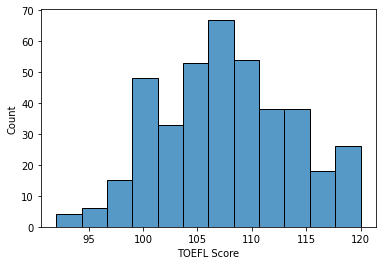

In [6]:
sns.histplot(graduate["TOEFL Score"])

<AxesSubplot:xlabel='SOP', ylabel='Count'>

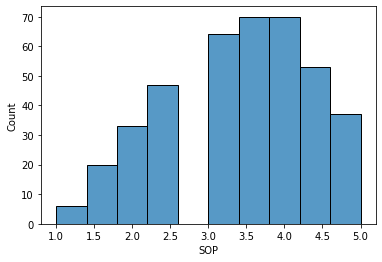

In [7]:
sns.histplot(graduate["SOP"])

<AxesSubplot:xlabel='University Rating', ylabel='Count'>

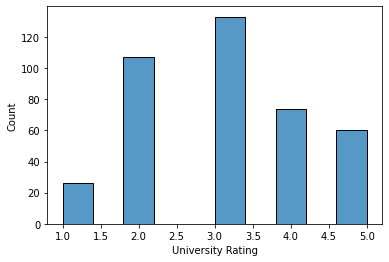

In [8]:
sns.histplot(graduate["University Rating"])

<AxesSubplot:xlabel='LOR', ylabel='Count'>

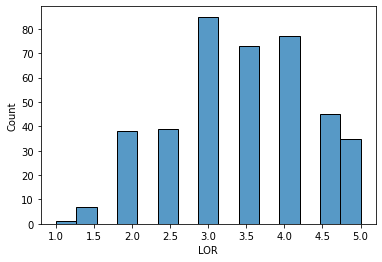

In [9]:
sns.histplot(graduate["LOR"])

In [10]:
graduate.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

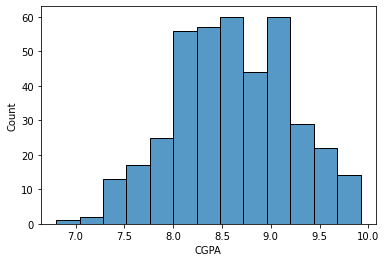

In [11]:
sns.histplot(graduate["CGPA"])

<AxesSubplot:xlabel='CGPA', ylabel='Count'>

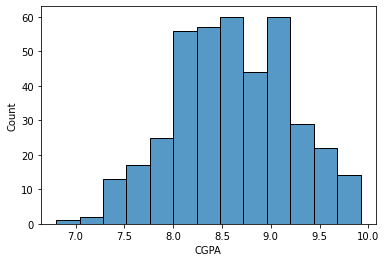

In [12]:
sns.histplot(graduate["CGPA"])

<AxesSubplot:xlabel='Chance of Admit', ylabel='Density'>

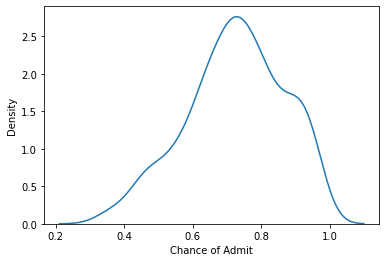

In [13]:
sns.kdeplot(graduate["Chance of Admit"])

In [14]:
import statsmodels.api as sm

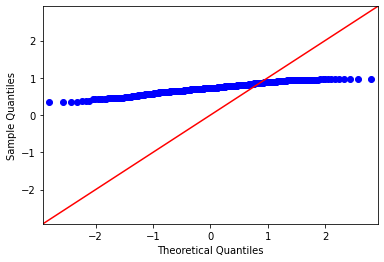

In [15]:
sm.qqplot(graduate["Chance of Admit"],line="45");

In [16]:
np.mean(graduate["Chance of Admit"])

0.7243499999999996

In [17]:
np.std(graduate["Chance of Admit"])

0.1424309569580995

In [18]:
from statsmodels.graphics.gofplots import qqplot_2samples

In [19]:
x=np.random.normal(loc=np.mean(graduate["Chance of Admit"]),scale=np.std(graduate["Chance of Admit"]),size = graduate.shape[1])

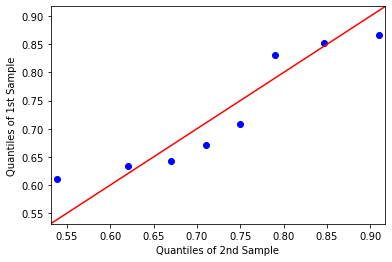

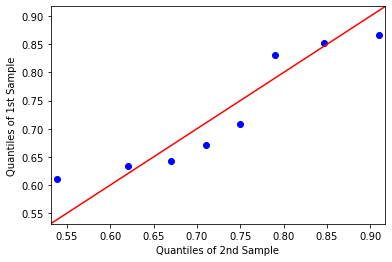

In [20]:
qqplot_2samples(graduate["Chance of Admit"],x,line="45")

In [21]:
from scipy.stats import shapiro
shapiro(graduate["Chance of Admit"])

ShapiroResult(statistic=0.9774671196937561, pvalue=7.037693649181165e-06)

In [22]:
graduate["admitted"] = np.where(graduate["Chance of Admit"]<=0.8,0,1)

In [23]:
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit,admitted
Serial No.,,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92,1
2,324,107,4,4.0,4.5,8.87,1,0.76,0
3,316,104,3,3.0,3.5,8.00,1,0.72,0
4,322,110,3,3.5,2.5,8.67,1,0.80,0
5,314,103,2,2.0,3.0,8.21,0,0.65,0


In [24]:
# Axis:- 0:Rows , 1:Columns
graduate = graduate.drop("Chance of Admit",axis=1)

In [25]:
graduate["admitted"].value_counts()

0    283
1    117
Name: admitted, dtype: int64

In [26]:
graduate.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,admitted
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,1
2,324,107,4,4.0,4.5,8.87,1,0
3,316,104,3,3.0,3.5,8.00,1,0
4,322,110,3,3.5,2.5,8.67,1,0
5,314,103,2,2.0,3.0,8.21,0,0


In [27]:
from sklearn.model_selection import train_test_split

In [28]:
# Random Forest Method
X = graduate.drop("admitted",axis=1)
y= graduate["admitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [29]:
# Import the model we are using
from sklearn.ensemble import RandomForestClassifier
# Instantiate model with 1000 decision trees
rf = RandomForestClassifier()
# Train the model on training data
rf.fit(X_train, y_train);

In [30]:
# Use the forest's predict method on the test data
y_pred = rf.predict(X_test)


In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        93
           1       0.94      0.87      0.91        39

    accuracy                           0.95       132
   macro avg       0.95      0.93      0.93       132
weighted avg       0.95      0.95      0.95       132

[[91  2]
 [ 5 34]]


In [32]:
X = graduate.drop("admitted",axis=1)
X=sm.add_constant(X)
y= graduate["admitted"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [33]:
import statsmodels.api as sm
log_reg = sm.Logit(y_train,X_train).fit()

Optimization terminated successfully.
         Current function value: 0.176587
         Iterations 9


In [34]:
log_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               admitted   No. Observations:                  268
Model:                          Logit   Df Residuals:                      260
Method:                           MLE   Df Model:                            7
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.7072
Time:                        02:14:10   Log-Likelihood:                -47.325
converged:                       True   LL-Null:                       -161.63
Covariance Type:            nonrobust   LLR p-value:                 9.832e-46
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               -78.3531     18.169     -4.312      0.000    -113.964     -42.743
GRE Score             0.0297      0.065      0.460      0.646      -0.097       0.156
TOEFL Score           0.0973      0.097      0.999      0.318      -0.094       0.288
University Rating     0.8199      0.386      2.124      0.034       0.063       1.577
SOP                  -0.3986      0.564     -0.707      0.480      -1.504       0.707
LOR                   0.5363      0.481      1.116      0.265      -0.406       1.479
CGPA                  5.9945      1.560      3.843      0.000       2.937       9.052
Research              0.8465      0.685      1.236      0.216      -0.495       2.189
=====================================================================================

Possibly complete quasi-separation: A fraction 0.14 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [35]:
y_pred = log_reg.predict(X_test)
y_pred = list(map(round, y_pred))

In [36]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96        93
           1       0.94      0.87      0.91        39

    accuracy                           0.95       132
   macro avg       0.95      0.93      0.93       132
weighted avg       0.95      0.95      0.95       132

[[91  2]
 [ 5 34]]


In [37]:
#y_pred = list(map(round, y_pred))
#graduate["admitted"] = np.where(graduate["Chance of Admit"]<=0.8,0,1)
#these two are doing the same work i.e np.where and list(map) 

In [38]:
graduate_1=graduate.drop("admitted",axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] =graduate_1.columns
vif['VIF'] = [variance_inflation_factor(graduate_1.values, i) for i in range(graduate_1.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
0,GRE Score,1438.45
1,TOEFL Score,1349.75
5,CGPA,1080.49
4,LOR,38.41
3,SOP,38.05
2,University Rating,22.14
6,Research,2.86


In [40]:
graduate_drop=graduate_1.drop("GRE Score",axis=1)

In [41]:
vif = pd.DataFrame()
vif['Features'] =graduate_drop.columns
vif['VIF'] = [variance_inflation_factor(graduate_drop.values, i) for i in range(graduate_drop.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
4,CGPA,829.46
0,TOEFL Score,731.85
3,LOR,38.36
2,SOP,36.47
1,University Rating,20.27
5,Research,2.86


In [42]:
graduate_drop=graduate_drop.drop("CGPA",axis=1)

In [43]:
vif = pd.DataFrame()
vif['Features'] =graduate_drop.columns
vif['VIF'] = [variance_inflation_factor(graduate_drop.values, i) for i in range(graduate_drop.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
3,LOR,36.63
2,SOP,36.34
0,TOEFL Score,21.87
1,University Rating,20.07
4,Research,2.85


In [44]:
graduate_drop=graduate_drop.drop("LOR",axis=1)
vif = pd.DataFrame()
vif['Features'] =graduate_drop.columns
vif['VIF'] = [variance_inflation_factor(graduate_drop.values, i) for i in range(graduate_drop.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
2,SOP,29.19
1,University Rating,19.13
0,TOEFL Score,16.45
3,Research,2.84


In [45]:
graduate_drop=graduate_drop.drop("SOP",axis=1)
vif = pd.DataFrame()
vif['Features'] =graduate_drop.columns
vif['VIF'] = [variance_inflation_factor(graduate_drop.values, i) for i in range(graduate_drop.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
1,University Rating,12.06
0,TOEFL Score,10.25
2,Research,2.76


In [46]:
graduate_drop=graduate_drop.drop("University Rating",axis=1)
vif = pd.DataFrame()
vif['Features'] =graduate_drop.columns
vif['VIF'] = [variance_inflation_factor(graduate_drop.values, i) for i in range(graduate_drop.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF",ascending=False)
vif

,Features,VIF
0,TOEFL Score,2.34
1,Research,2.34


In [47]:
X_final = graduate[["TOEFL Score","Research"]]
X_final=sm.add_constant(X_final)
y_final= graduate["admitted"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

In [48]:
log_reg_final = sm.Logit(y_train,X_train).fit()
print(log_reg_final.summary())


Optimization terminated successfully.
         Current function value: 0.296390
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                  268
Model:                          Logit   Df Residuals:                      265
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5085
Time:                        02:14:11   Log-Likelihood:                -79.433
converged:                       True   LL-Null:                       -161.63
Covariance Type:            nonrobust   LLR p-value:                 2.012e-36
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -47.8266      6.812     -7.021      0.000     -61.177     -34.476
TOEFL Score     0.4156    

# Assumptions of Logistic Regression 

## Assumption 1— Appropriate Outcome Type

The Response Variable is Binary so it is an appropriate outcome type

## Assumption 2 — Linearity of independent variables and log-odds

Optimization terminated successfully.
         Current function value: 0.270656
         Iterations 8


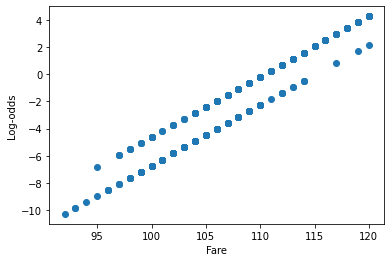

In [49]:
logit_results = sm.Logit(y_final, X_final, family=sm.families.Binomial()).fit()
predicted = logit_results.predict(X_final)

# Getting log odds values
log_odds = np.log(predicted / (1 - predicted))

plt.scatter(x=X_final['TOEFL Score'].values, y=log_odds)
plt.xlabel("Fare")
plt.ylabel("Log-odds")
plt.show()

**The log-odds are linear with the final predictor variable hence the assumption-2 is met**

## Assumption 3— No strongly influential outliers

In [50]:
from scipy import stats 
# Get influence measures
logit_results = sm.GLM(y_final, X_final, family=sm.families.Binomial()).fit()
# Get influence measures
influence = logit_results.get_influence()

# Obtain summary df of influence measures
summ_df = influence.summary_frame()

# Filter summary df to Cook's distance values only
diagnosis_df = summ_df[['cooks_d']]

# Set Cook's distance threshold
cook_threshold = 4 / len(X_final)

# Append absolute standardized residual values 
diagnosis_df['std_resid'] = stats.zscore(logit_results.resid_pearson)
diagnosis_df['std_resid'] = diagnosis_df['std_resid'].apply(lambda x: np.abs(x))

# Find observations which are BOTH outlier (std dev > 3) and highly influential
extreme = diagnosis_df[(diagnosis_df['cooks_d'] > cook_threshold) & 
                       (diagnosis_df['std_resid'] > 3)]

# Show top 5 highly influential outlier observations
extreme.sort_values("cooks_d", ascending=False).head()

,cooks_d,std_resid
Serial No.,,
289,0.107504,12.262885
360,0.075444,6.298853
178,0.056331,3.235680
53,0.035102,3.580827
139,0.035102,3.580827


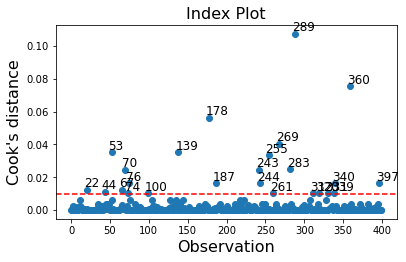

In [51]:
fig = influence.plot_index(y_var="cooks", threshold=cook_threshold)
plt.axhline(y=cook_threshold, ls="--", color='red')
fig.tight_layout(pad=2)

In [52]:
graduate.shape

(400, 8)

In [60]:
extreme = diagnosis_df[(diagnosis_df['std_resid'] > 3) & (diagnosis_df['cooks_d'] > cook_threshold)]

In [63]:
graduate = graduate.drop(graduate.index[extreme.index])

In [64]:
X_final = graduate[["TOEFL Score","Research"]]
X_final=sm.add_constant(X_final)
y_final= graduate["admitted"]
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)

log_reg_final = sm.Logit(y_train,X_train).fit()
print(log_reg_final.summary())

Optimization terminated successfully.
         Current function value: 0.266259
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:               admitted   No. Observations:                  264
Model:                          Logit   Df Residuals:                      261
Method:                           MLE   Df Model:                            2
Date:                Sat, 07 Jan 2023   Pseudo R-squ.:                  0.5743
Time:                        02:18:44   Log-Likelihood:                -70.292
converged:                       True   LL-Null:                       -165.13
Covariance Type:            nonrobust   LLR p-value:                 6.496e-42
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -55.7080      7.903     -7.049      0.000     -71.197     -40.219
TOEFL Score     0.4842    

## Assumption 4 — Absence of Multicollinearity

Assumption of multicollinearity has been dealt with earlier

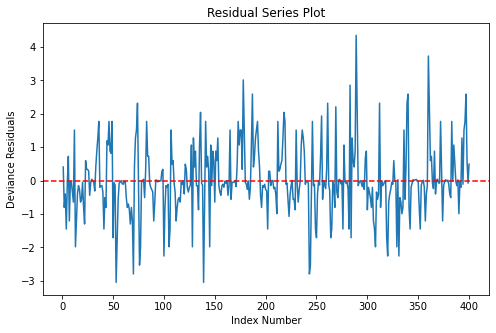

In [71]:
logit_results = sm.GLM(y_final, X_final, family=sm.families.Binomial()).fit()

# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(X_final.index.tolist(), stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red');

Since the residuals in the plot above appear to be randomly scattered around the centerline of zero, we can infer (visually) that the assumption is satisfied.

In [73]:
from statsmodels.stats.stattools import durbin_watson
  
# Using statsmodels.durbin_watson() method
gfg = durbin_watson(stats.zscore(logit_results.resid_deviance))
gfg 

After using Durbin Watson test we can say that there is no autocorrelation hence the error terms are independent